Importing libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageTk, Image
import PIL.Image
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

IMPORTING CSV FILE(DATA)

In [38]:
global df


df = pd.concat(dfs) #with the help of pandas the dataframe is been attached 

In [39]:
import pandas as pd
import csv
df = pd.read_csv("party_track.csv")
df = df.iloc[:100,]
df

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3XIIOCu6B8PuGq5j61asEM,The Greatest,spotify:track:3XIIOCu6B8PuGq5j61asEM,"Sia, Kendrick Lamar,",0.01,0.67,210893,0.72,0.00,1,0.05,-6.16,1,0.27,192.02,4,0.73
1,1vvNmPOiUuyCbgWmtc6yfm,My Way,spotify:track:1vvNmPOiUuyCbgWmtc6yfm,"Calvin Harris,",0.09,0.82,219160,0.91,0.00,4,0.16,-3.06,0,0.04,119.99,4,0.52
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey,",0.41,0.75,244960,0.52,0.00,8,0.11,-5.60,1,0.03,95.01,4,0.64
3,1mSlftOO1dlDRXAyOE0Sbd,Treat You Better,spotify:track:1mSlftOO1dlDRXAyOE0Sbd,"Shawn Mendes,",0.13,0.45,187973,0.82,0.00,10,0.10,-4.07,0,0.39,83.02,4,0.72
4,4Ce37cRWvM1vIGGynKcs22,Starving,spotify:track:4Ce37cRWvM1vIGGynKcs22,"Hailee Steinfeld, Grey, Zedd,",0.39,0.71,181880,0.62,0.00,4,0.10,-4.19,1,0.09,99.95,4,0.52
5,4nA0biSjtvOL41Hd9MBXqR,Ain't My Fault,spotify:track:4nA0biSjtvOL41Hd9MBXqR,"Zara Larsson,",0.01,0.58,224031,0.78,0.00,6,0.28,-4.83,0,0.03,141.15,4,0.35
6,0azC730Exh71aQlOt9Zj3y,This Is What You Came For,spotify:track:0azC730Exh71aQlOt9Zj3y,"Calvin Harris, Rihanna,",0.20,0.63,222160,0.93,0.12,9,0.15,-2.79,0,0.03,123.96,4,0.46
7,4dASQiO1Eoo3RJvt74FtXB,"Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)",spotify:track:4dASQiO1Eoo3RJvt74FtXB,"Lil Wayne, Wiz Khalifa, Imagine Dragons, Logic, Ty Dolla $ign, X Ambassadors,",0.26,0.50,243491,0.79,0.00,9,0.65,-4.38,0,0.32,169.02,4,0.73
8,5GQBDz6S6KuurT5GXFtfiV,Come First,spotify:track:5GQBDz6S6KuurT5GXFtfiV,"Terror Jr,",0.12,0.75,171789,0.20,0.00,5,0.09,-11.75,1,0.32,95.08,4,0.37
9,2meEiZKWkiN28gITzFwQo5,Into You,spotify:track:2meEiZKWkiN28gITzFwQo5,"Ariana Grande,",0.02,0.64,244453,0.73,0.00,9,0.15,-5.87,1,0.10,107.99,4,0.38


In [40]:
df.describe() #the whole details has been described

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,0.12,0.65,"216,031.41",0.73,0.01,5.16,0.20,-5.53,0.47,0.10,116.24,4.01,0.46
std,0.15,0.10,"30,185.04",0.14,0.04,3.48,0.16,1.73,0.50,0.09,23.90,0.10,0.20
min,0.00,0.37,"152,461.00",0.20,0.00,0.00,0.04,-11.75,0.00,0.03,74.96,4.00,0.13
25%,0.02,0.60,"196,439.75",0.66,0.00,2.00,0.10,-6.42,0.00,0.04,100.00,4.00,0.30
50%,0.06,0.66,"212,939.00",0.74,0.00,5.00,0.15,-5.31,0.00,0.06,110.15,4.00,0.43
75%,0.16,0.73,"228,827.50",0.81,0.00,8.00,0.25,-4.39,1.00,0.13,127.99,4.00,0.62
max,0.62,0.90,"352,500.00",0.97,0.37,11.00,0.85,-2.55,1.00,0.39,192.02,5.00,0.92


In [41]:
df.columns # columns are displayed

Index(['id', 'name', 'uri', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'], dtype='object')

In [42]:
df = df.dropna() #with the help of this we drop the nan values
df

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3XIIOCu6B8PuGq5j61asEM,The Greatest,spotify:track:3XIIOCu6B8PuGq5j61asEM,"Sia, Kendrick Lamar,",0.01,0.67,210893,0.72,0.00,1,0.05,-6.16,1,0.27,192.02,4,0.73
1,1vvNmPOiUuyCbgWmtc6yfm,My Way,spotify:track:1vvNmPOiUuyCbgWmtc6yfm,"Calvin Harris,",0.09,0.82,219160,0.91,0.00,4,0.16,-3.06,0,0.04,119.99,4,0.52
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey,",0.41,0.75,244960,0.52,0.00,8,0.11,-5.60,1,0.03,95.01,4,0.64
3,1mSlftOO1dlDRXAyOE0Sbd,Treat You Better,spotify:track:1mSlftOO1dlDRXAyOE0Sbd,"Shawn Mendes,",0.13,0.45,187973,0.82,0.00,10,0.10,-4.07,0,0.39,83.02,4,0.72
4,4Ce37cRWvM1vIGGynKcs22,Starving,spotify:track:4Ce37cRWvM1vIGGynKcs22,"Hailee Steinfeld, Grey, Zedd,",0.39,0.71,181880,0.62,0.00,4,0.10,-4.19,1,0.09,99.95,4,0.52
5,4nA0biSjtvOL41Hd9MBXqR,Ain't My Fault,spotify:track:4nA0biSjtvOL41Hd9MBXqR,"Zara Larsson,",0.01,0.58,224031,0.78,0.00,6,0.28,-4.83,0,0.03,141.15,4,0.35
6,0azC730Exh71aQlOt9Zj3y,This Is What You Came For,spotify:track:0azC730Exh71aQlOt9Zj3y,"Calvin Harris, Rihanna,",0.20,0.63,222160,0.93,0.12,9,0.15,-2.79,0,0.03,123.96,4,0.46
7,4dASQiO1Eoo3RJvt74FtXB,"Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)",spotify:track:4dASQiO1Eoo3RJvt74FtXB,"Lil Wayne, Wiz Khalifa, Imagine Dragons, Logic, Ty Dolla $ign, X Ambassadors,",0.26,0.50,243491,0.79,0.00,9,0.65,-4.38,0,0.32,169.02,4,0.73
8,5GQBDz6S6KuurT5GXFtfiV,Come First,spotify:track:5GQBDz6S6KuurT5GXFtfiV,"Terror Jr,",0.12,0.75,171789,0.20,0.00,5,0.09,-11.75,1,0.32,95.08,4,0.37
9,2meEiZKWkiN28gITzFwQo5,Into You,spotify:track:2meEiZKWkiN28gITzFwQo5,"Ariana Grande,",0.02,0.64,244453,0.73,0.00,9,0.15,-5.87,1,0.10,107.99,4,0.38


visualisation

In [43]:
numerical_features = ['acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

In [44]:
df.shape

(100, 17)

In [45]:
#X = df[numerical_features]
#y = df['class']
#X.shape

F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


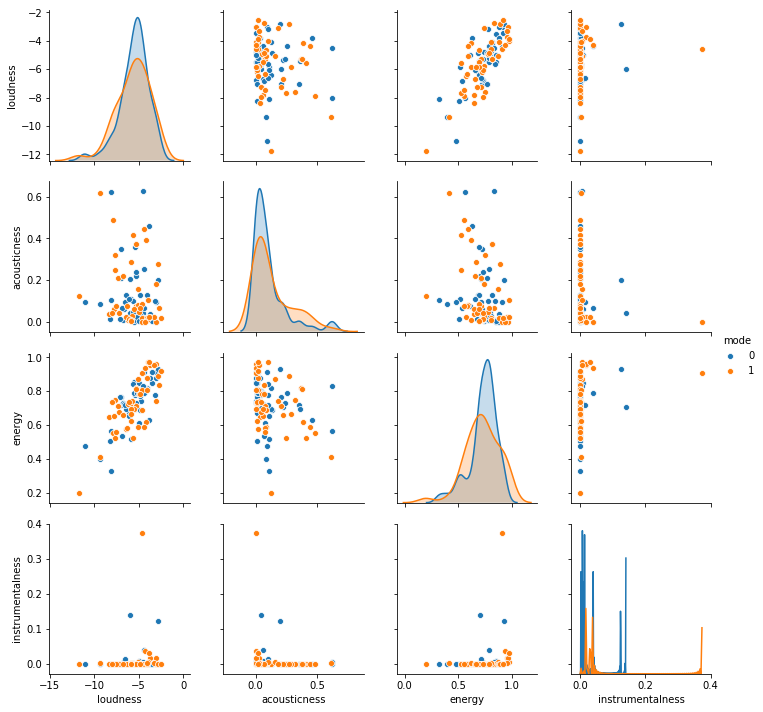

In [46]:

s=sns.pairplot(df,vars= ['loudness','acousticness','energy','instrumentalness'],hue='mode')

s.savefig("graph.png")
load = Image.open("graph.png")
#load

In [47]:
# Import dataset
#spotify_dataset = pd.read_csv('top2018.csv')
#spotify_dataset.head(5)

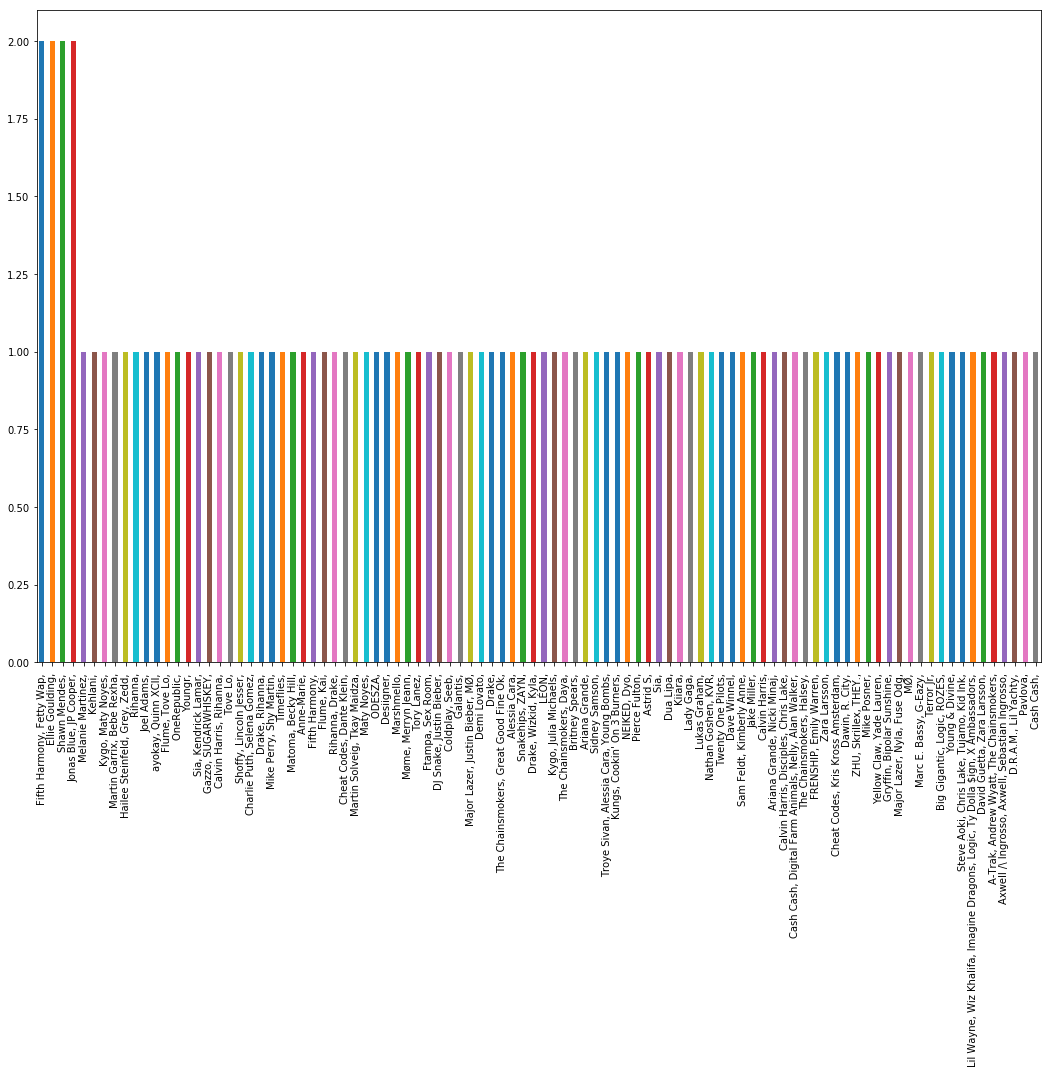

In [48]:
# Lets check the artists we have here in top 100 tracks and the number of their songs made it to the top 100
plt.figure(figsize=(18,12))
df['artist'].value_counts().plot.bar()
plt.savefig("graph1.png")
load1 = Image.open("graph1.png")
#load1

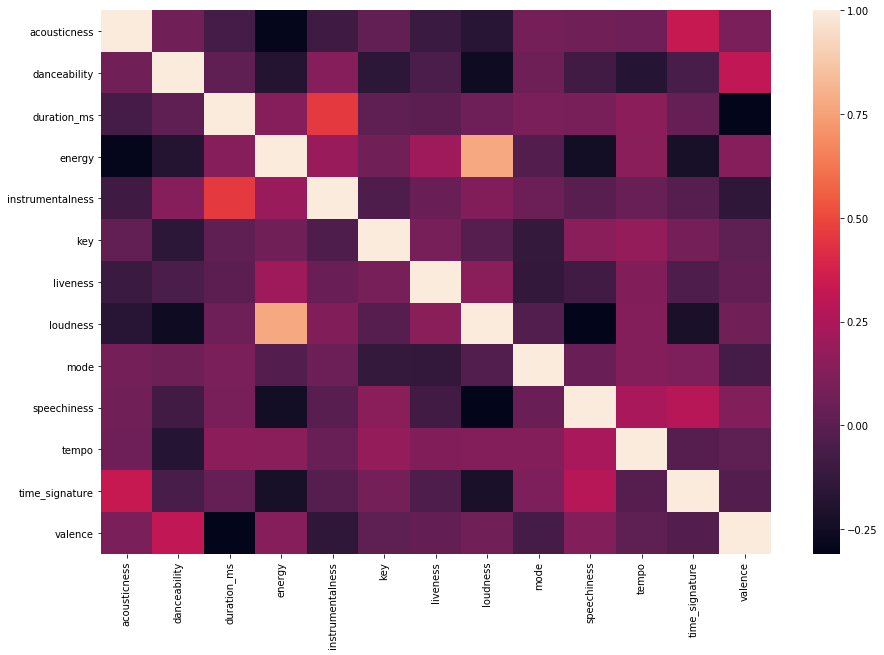

In [49]:
# Lets see the correlation between features in our dataset
plt.figure(figsize=(15,10))
s1=sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.savefig("graph2.png")
load2 = Image.open("graph2.png")
#load2

The correlation heatmap describes few characterisitcs of this dataset. Energy and loudness of the tracks are directly proportional, means if the loudness of a track increases then chances of it being energetic are quite higher. On contrary, a high pich track reducess the acousticness (A confidence measure of whether the track is acoustic.)


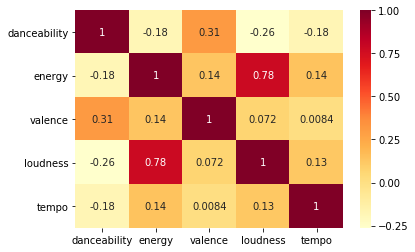

In [50]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]
s2=sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")
plt.savefig("graph3.png")
load3 = Image.open("graph3.png")
#load3

In [51]:
df['artist'].value_counts().head(10)


Fifth Harmony, Fetty Wap,         2
Ellie Goulding,                   2
Shawn Mendes,                     2
Jonas Blue, JP Cooper,            2
Melanie Martinez,                 1
Kehlani,                          1
Kygo, Maty Noyes,                 1
Martin Garrix, Bebe Rexha,        1
Hailee Steinfeld, Grey, Zedd,     1
Rihanna,                          1
Name: artist, dtype: int64

# DATA CLEANING

In [52]:
df.columns

Index(['id', 'name', 'uri', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'], dtype='object')

In [53]:
#df['Duration_min']=df['duration_ms']/60000
#df.drop(columns='duration_ms',inplace=True)

In [54]:
# added a popularity column.
df['popularity'] = df.index + 1
df.head()

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,3XIIOCu6B8PuGq5j61asEM,The Greatest,spotify:track:3XIIOCu6B8PuGq5j61asEM,"Sia, Kendrick Lamar,",0.01,0.67,210893,0.72,0.00,1,0.05,-6.16,1,0.27,192.02,4,0.73,1
1,1vvNmPOiUuyCbgWmtc6yfm,My Way,spotify:track:1vvNmPOiUuyCbgWmtc6yfm,"Calvin Harris,",0.09,0.82,219160,0.91,0.00,4,0.16,-3.06,0,0.04,119.99,4,0.52,2
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey,",0.41,0.75,244960,0.52,0.00,8,0.11,-5.60,1,0.03,95.01,4,0.64,3
3,1mSlftOO1dlDRXAyOE0Sbd,Treat You Better,spotify:track:1mSlftOO1dlDRXAyOE0Sbd,"Shawn Mendes,",0.13,0.45,187973,0.82,0.00,10,0.10,-4.07,0,0.39,83.02,4,0.72,4
4,4Ce37cRWvM1vIGGynKcs22,Starving,spotify:track:4Ce37cRWvM1vIGGynKcs22,"Hailee Steinfeld, Grey, Zedd,",0.39,0.71,181880,0.62,0.00,4,0.10,-4.19,1,0.09,99.95,4,0.52,5


In [55]:
df["hl"]="http://open.spotify.com/track/"+df.id
df.hl[0]

'http://open.spotify.com/track/3XIIOCu6B8PuGq5j61asEM'

In [56]:
df['TF']=df['popularity']<=20 #top 100
df.columns


Index(['id', 'name', 'uri', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity', 'hl', 'TF'], dtype='object')

In [57]:
y = df[['TF']]
x = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms']]

In [58]:
top100 = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms', 'popularity',
       'TF']]
top100

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity,TF
0,0.67,0.72,1,-6.16,1,0.27,0.01,0.00,0.05,0.73,192.02,4,210893,1,True
1,0.82,0.91,4,-3.06,0,0.04,0.09,0.00,0.16,0.52,119.99,4,219160,2,True
2,0.75,0.52,8,-5.60,1,0.03,0.41,0.00,0.11,0.64,95.01,4,244960,3,True
3,0.45,0.82,10,-4.07,0,0.39,0.13,0.00,0.10,0.72,83.02,4,187973,4,True
4,0.71,0.62,4,-4.19,1,0.09,0.39,0.00,0.10,0.52,99.95,4,181880,5,True
5,0.58,0.78,6,-4.83,0,0.03,0.01,0.00,0.28,0.35,141.15,4,224031,6,True
6,0.63,0.93,9,-2.79,0,0.03,0.20,0.12,0.15,0.46,123.96,4,222160,7,True
7,0.50,0.79,9,-4.38,0,0.32,0.26,0.00,0.65,0.73,169.02,4,243491,8,True
8,0.75,0.20,5,-11.75,1,0.32,0.12,0.00,0.09,0.37,95.08,4,171789,9,True
9,0.64,0.73,9,-5.87,1,0.10,0.02,0.00,0.15,0.38,107.99,4,244453,10,True


In [59]:
top100.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity,TF
95,0.58,0.95,9,-3.34,1,0.08,0.02,0.00,0.22,0.60,127.96,4,191250,96,False
96,0.59,0.89,5,-2.85,1,0.09,0.28,0.00,0.08,0.25,126.03,4,218973,97,False
97,0.64,0.83,8,-4.50,0,0.05,0.62,0.01,0.14,0.79,127.99,4,212509,98,False
98,0.63,0.92,11,-2.55,1,0.07,0.02,0.00,0.48,0.58,130.04,4,231173,99,False
99,0.69,0.97,7,-3.85,1,0.08,0.02,0.03,0.09,0.70,125.99,4,179250,100,False


In [60]:
y = top100[['TF']]
x = top100[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms']]

In [61]:
df["hl"]="http://open.spotify.com/track/"+df.id+"          "+df.name
df

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,hl,TF
0,3XIIOCu6B8PuGq5j61asEM,The Greatest,spotify:track:3XIIOCu6B8PuGq5j61asEM,"Sia, Kendrick Lamar,",0.01,0.67,210893,0.72,0.00,1,0.05,-6.16,1,0.27,192.02,4,0.73,1,http://open.spotify.com/track/3XIIOCu6B8PuGq5j61asEM The Greatest,True
1,1vvNmPOiUuyCbgWmtc6yfm,My Way,spotify:track:1vvNmPOiUuyCbgWmtc6yfm,"Calvin Harris,",0.09,0.82,219160,0.91,0.00,4,0.16,-3.06,0,0.04,119.99,4,0.52,2,http://open.spotify.com/track/1vvNmPOiUuyCbgWmtc6yfm My Way,True
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey,",0.41,0.75,244960,0.52,0.00,8,0.11,-5.60,1,0.03,95.01,4,0.64,3,http://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw Closer,True
3,1mSlftOO1dlDRXAyOE0Sbd,Treat You Better,spotify:track:1mSlftOO1dlDRXAyOE0Sbd,"Shawn Mendes,",0.13,0.45,187973,0.82,0.00,10,0.10,-4.07,0,0.39,83.02,4,0.72,4,http://open.spotify.com/track/1mSlftOO1dlDRXAyOE0Sbd Treat You Better,True
4,4Ce37cRWvM1vIGGynKcs22,Starving,spotify:track:4Ce37cRWvM1vIGGynKcs22,"Hailee Steinfeld, Grey, Zedd,",0.39,0.71,181880,0.62,0.00,4,0.10,-4.19,1,0.09,99.95,4,0.52,5,http://open.spotify.com/track/4Ce37cRWvM1vIGGynKcs22 Starving,True
5,4nA0biSjtvOL41Hd9MBXqR,Ain't My Fault,spotify:track:4nA0biSjtvOL41Hd9MBXqR,"Zara Larsson,",0.01,0.58,224031,0.78,0.00,6,0.28,-4.83,0,0.03,141.15,4,0.35,6,http://open.spotify.com/track/4nA0biSjtvOL41Hd9MBXqR Ain't My Fault,True
6,0azC730Exh71aQlOt9Zj3y,This Is What You Came For,spotify:track:0azC730Exh71aQlOt9Zj3y,"Calvin Harris, Rihanna,",0.20,0.63,222160,0.93,0.12,9,0.15,-2.79,0,0.03,123.96,4,0.46,7,http://open.spotify.com/track/0azC730Exh71aQlOt9Zj3y This Is What You Came For,True
7,4dASQiO1Eoo3RJvt74FtXB,"Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)",spotify:track:4dASQiO1Eoo3RJvt74FtXB,"Lil Wayne, Wiz Khalifa, Imagine Dragons, Logic, Ty Dolla $ign, X Ambassadors,",0.26,0.50,243491,0.79,0.00,9,0.65,-4.38,0,0.32,169.02,4,0.73,8,"http://open.spotify.com/track/4dASQiO1Eoo3RJvt74FtXB Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)",True
8,5GQBDz6S6KuurT5GXFtfiV,Come First,spotify:track:5GQBDz6S6KuurT5GXFtfiV,"Terror Jr,",0.12,0.75,171789,0.20,0.00,5,0.09,-11.75,1,0.32,95.08,4,0.37,9,http://open.spotify.com/track/5GQBDz6S6KuurT5GXFtfiV Come First,True
9,2meEiZKWkiN28gITzFwQo5,Into You,spotify:track:2meEiZKWkiN28gITzFwQo5,"Ariana Grande,",0.02,0.64,244453,0.73,0.00,9,0.15,-5.87,1,0.10,107.99,4,0.38,10,http://open.spotify.com/track/2meEiZKWkiN28gITzFwQo5 Into You,True


In [62]:
from sklearn.model_selection import train_test_split


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((90, 13), (10, 13), (90, 1), (10, 1))

In [64]:
from sklearn.ensemble import RandomForestClassifier as rf
clf = rf(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train, y_train)


F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
d = list(top100.columns)
xx = list(clf.feature_importances_)
for i in range(13):
    print(d[i], xx[i], sep=' :: ')

danceability :: 0.05911046401322237
energy :: 0.10529207236988034
key :: 0.03889759333295185
loudness :: 0.10255523849370282
mode :: 0.009524413548373219
speechiness :: 0.1870118212754334
acousticness :: 0.0638706976745103
instrumentalness :: 0.06276661309760515
liveness :: 0.06494010997020626
valence :: 0.08732758736344338
tempo :: 0.1461411272829708
time_signature :: 0.0018293541750093192
duration_ms :: 0.07073290740269082


In [66]:
clf.score(x_train, y_train)


0.8111111111111111

In [67]:
clf.score(x_test, y_test)


0.8

In [68]:
df["hl"]

0     http://open.spotify.com/track/3XIIOCu6B8PuGq5j61asEM          The Greatest                                                                                  
1     http://open.spotify.com/track/1vvNmPOiUuyCbgWmtc6yfm          My Way                                                                                        
2     http://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw          Closer                                                                                        
3     http://open.spotify.com/track/1mSlftOO1dlDRXAyOE0Sbd          Treat You Better                                                                              
4     http://open.spotify.com/track/4Ce37cRWvM1vIGGynKcs22          Starving                                                                                      
5     http://open.spotify.com/track/4nA0biSjtvOL41Hd9MBXqR          Ain't My Fault                                                                                
6     http://open.spot

# Tkinter GUI

In [69]:
pip install spotipy


The following command must be run outside of the IPython shell:

    $ pip install spotipy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [70]:
#Final GUI
from tkinter import *
import tkinter as tk
#import spotipy
import webbrowser
from tkinter import *
import tkinter
import tkinter as tk
from tkinter.filedialog import askopenfilename
from tkinter import HORIZONTAL
from tkinter import BOTTOM
from PIL import ImageTk, Image
import PIL.Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sys


root=tkinter.Tk()
root.title("PlayMusic")
root.minsize(width=600,height=500)
root.maxsize(width=1180,height=700)
from tkinter import *
from PIL import Image, ImageTk

image=Image.open("party1.jpg")
photo=ImageTk.PhotoImage(image)
pic=Label(image=photo)




def display_hyperlinks():
    newwind = tk.Toplevel(root)
    newwind.title("Spotify")
    newwind.geometry('1180x720')
    xscrollbar = tk.Scrollbar(newwind, orient=HORIZONTAL)
    xscrollbar.pack(side=BOTTOM)
    yscrollbar = Scrollbar(newwind)
    yscrollbar.pack(side=RIGHT, fill=Y)
   
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', -1)
    pd.set_option('display.width', 1080)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    text = Text(newwind, wrap=NONE,xscrollcommand=xscrollbar.set,yscrollcommand=yscrollbar.set,font=("Comic Sans MS",15),bg="black",fg="light blue")
    text.insert(END,df.hl)
    #labe0=tk.Label(newwind,text=df['name'],foreground="black")
    #labe0.place(x=550,y=0)
    #labe0.configure(bg="white")
    button=Button(newwind,text="Back ", width=30,height=2,command=newwind.destroy).place(x=890,y=580)
    newwind.grid_columnconfigure(0, weight=1)
    text.pack(expand=True, fill='both')
    xscrollbar.config(command=text.xview)
    yscrollbar.config(command=text.yview)
    text.config(state=DISABLED)

    
def display_correlation():
    newwind = tk.Toplevel(root)
    newwind.title("Correlation")
    newwind.geometry('1000x600')
    newwind.configure(background='white')
    button=Button(newwind,text="Back ", width=30,height=2,command=newwind.destroy).place(x=790,y=550)
    label=tk.Label(newwind,text="Correlation",foreground="black",font=('Times',30))
    label.place(x=270,y=40)
    label.configure(bg="white")
    #load = Image.open("graph.png")
    render = ImageTk.PhotoImage(load3)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=120, y=90)
    
def display_heatmap():
    newwind = tk.Toplevel(root)
    newwind.title("Heat Map",)
    newwind.geometry('1280x720')
    newwind.configure(background='white')
    button=Button(newwind,text="Back ", width=30,height=2,command=newwind.destroy).place(x=1090,y=580)
    label=tk.Label(newwind,text="Heat Map",foreground="black",font=("Comic Sans MS",20))
    label.place(x=1090,y=40)
    label.configure(bg="white")
    #load = Image.open("graph.png")
    render = ImageTk.PhotoImage(load2)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=-5,y=-30)
    
def display_graph():
    newwind = tk.Toplevel(root)
    newwind.title("Graph")
    newwind.geometry('1280x720')
    newwind.configure(background='white')
    button=Button(newwind,text="Back ", width=30,height=2,command=newwind.destroy).place(x=320,y=580)
    label=tk.Label(newwind,text="T\nO\nP\n\n\nA\nR\nT\nI\nS\nT\nS",foreground="black",fg="red",font=('Times',20))
    label.place(x=1170,y=40)
    label.configure(bg="white")
    #load = Image.open("graph.png")
    render = ImageTk.PhotoImage(load1)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=-130, y=-135)
    
def display_scattergraph():
    newwind = tk.Toplevel(root)
    newwind.title("Scatter Graph")
    newwind.geometry('1080x720')
    newwind.configure(background='white')
    button=Button(newwind,text="Back ", width=30,height=2,command=newwind.destroy).place(x=900,y=600)
    label=tk.Label(newwind,text="Correlation",foreground="black",font=('Times',30))
    label.place(x=270,y=40)
    label.configure(bg="white")
    load = Image.open("graph.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=20, y=-15)
    
def demo():
    newwind = tk.Toplevel(root)
    newwind.title("Play top 10 on spotify")
    newwind.geometry('1280x720')
    newwind.configure(background='light yellow')
    button=Button(newwind,text="Back ",bg='black',fg='white', width=30,height=2,command=newwind.destroy).place(x=550,y=650)
    label=tk.Label(newwind,text="Play top 10 on spotify",foreground="black",font=('Comic Sans MS',30))
    label.place(x=520,y=20)
    label.configure(bg="white")
    link1 = Label(newwind, text="1. Closer", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link1.place(x=50,y=300)
    link1.bind("<Button-1>",callback1)
   # image=Image.open("closer.png")
    #image.place(x=800,y=100)
    load = PIL.Image.open("closer.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=-5, y=80)

    
    link2 = Label(newwind, text="2. Greatest", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link2.place(x=50,y=570)
    link2.bind("<Button-1>",callback2)
    load = PIL.Image.open("greatest.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=-5, y=350)
    
    
    link3 = Label(newwind, text="3. Dangerous Women", fg="green", font=("Comic Sans MS", 15),cursor="hand2")
    link3.place(x=230,y=300)
    link3.bind("<Button-1>",callback3)
    load = PIL.Image.open("danwo.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=230, y=80)

    link4 = Label(newwind, text="4. Treat You better", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link4.place(x=250,y=570)
    link4.bind("<Button-1>",callback4)
    load = PIL.Image.open("tyb.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=250, y=350)
    
    link6 = Label(newwind, text="5.This is what you came for", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link6.place(x=480,y=300)
    link6.bind("<Button-1>",callback5)
    load = PIL.Image.open("this.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=480, y=80)
    
    link7 = Label(newwind, text="6.Hymn For The Weekend ", fg="green",font=("Comic Sans MS", 15),cursor="hand2")
    link7.place(x=480,y=570)
    link7.bind("<Button-1>",callback6)
    load = PIL.Image.open("hym.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=480, y=350)
    
    
    link8 = Label(newwind, text="7.Don't Let Me Down", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link8.place(x=750,y=300)
    link8.bind("<Button-1>",callback7)
    load = PIL.Image.open("dont.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=750, y=80)
    
    
    link9 = Label(newwind, text="8.Cold Water ", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link9.place(x=750,y=570)
    link9.bind("<Button-1>",callback8)
    load = PIL.Image.open("cold.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=750, y=350)    
    
    link10 = Label(newwind, text="9.Let Me Love You", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link10.place(x=1000,y=300)
    link10.bind("<Button-1>",callback9)
    load = PIL.Image.open("letme.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=1000, y=80)    
    
    link5 = Label(newwind, text="10.Starving", fg="green",font=("Comic Sans MS", 15), cursor="hand2")
    link5.place(x=1000,y=570)
    link5.bind("<Button-1>",callback10)
    load = PIL.Image.open("star.png")
    render = ImageTk.PhotoImage(load)
    img = Label(newwind, image=render)
    img.image = render
    img.place(x=1000, y=350)    
    
    
def callback1(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw")

def callback2(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/3XIIOCu6B8PuGq5j61asEM")

def callback3(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/2meEiZKWkiN28gITzFwQo5")

def callback4(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/1mSlftOO1dlDRXAyOE0Sbd")

def callback5(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/0azC730Exh71aQlOt9Zj3y ")
def callback6(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/6s3GEN8wK0OMzzzZbXj0fu")
def callback7(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/1i1fxkWeaMmKEB4T7zqbzK")    
def callback8(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/7zsXy7vlHdItvUSH8EwQss")
def callback9(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/0lYBSQXN6rCTvUZvg9S0lU")
def callback10(event):
   
    webbrowser.open_new(r"http://open.spotify.com/track/4Ce37cRWvM1vIGGynKcs22")    

root.configure(background='Blue')
label=tk.Label(root,text="MELODY SET",font=("Comic Sans MS", 45),fg="red2")
label.place(x=390,y=50)
label.configure(bg="ghost white")


button1=tk.Button(root,text="Spotify your song", width=20,height=2,command=display_hyperlinks,bg="light blue",bd=10,foreground="black",font=("Comic Sans MS",15)).place(x=820,y=420)
button2=tk.Button(root,text="Correlation", width=20,height=2,command=display_correlation,bg="light yellow",bd=10,foreground="black",font=("Comic Sans MS",15)).place(x=30,y=420)
button3=tk.Button(root,text="Heat Map", width=20,height=2,command=display_heatmap,bg="light yellow",bd=10,foreground="black",font=("Comic Sans MS",15)).place(x=30,y=320)
button4=tk.Button(root,text="Artists top list", width=20,height=2,command=display_graph,bd=10,bg="light blue",foreground="black",font=("Comic Sans MS",15)).place(x=820,y=220)
button5=tk.Button(root,text="Relation ", width=20,height=2,command=display_scattergraph,bd=10,bg="light yellow",foreground="black",font=("Comic Sans MS",15)).place(x=30,y=220)
button6=tk.Button(root,text="Hit 10 Songs", width=20,height=2,command=demo,bg="light blue",bd=10,foreground="black",font=("Comic Sans MS",15)).place(x=820,y=320)
button7=tk.Button(root,text="Exit", width=20,height=2,command=root.destroy,bg="light pink",bd=10,foreground="Red",font=("Comic Sans MS",15)).place(x=420,y=550)

pic.pack()
root.mainloop()